# DBSCAN Fun
In this notebook, we'll explore DBSCAN with 2 different datasets. DBSCAN or Density-Based Spatial Clustering of Applications with Noise is a clustering algorithm that finds core samples of high density and expands clusters from them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.datasets import make_circles

%matplotlib inline

## NHL Data

In [2]:
# Import data
df = pd.read_csv('./datasets//nhl.csv')

print(df.shape)
df.head()

(90, 28)


,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### EDA

In [3]:
# See all columnsds
df.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [4]:
# Check for Nans and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
Team    90 non-null object
PTS     90 non-null int64
Rank    90 non-null int64
TOI     90 non-null object
GF      90 non-null int64
GA      90 non-null int64
GF60    90 non-null float64
GA60    90 non-null float64
GF%     90 non-null float64
SF      90 non-null int64
SA      90 non-null int64
SF60    90 non-null float64
SA60    90 non-null float64
SF%     90 non-null float64
FF      90 non-null int64
FA      90 non-null int64
FF60    90 non-null float64
FA60    90 non-null float64
FF%     90 non-null float64
CF      90 non-null int64
CA      90 non-null int64
CF60    90 non-null float64
CA60    90 non-null float64
CF%     90 non-null float64
Sh%     90 non-null float64
Sv%     90 non-null float64
PDO     90 non-null int64
PIM     90 non-null int64
dtypes: float64(14), int64(12), object(2)
memory usage: 19.8+ KB


No apparent Nans and 2 object columns, 'Team' and 'TOI'. We'll exclude these columns the first time around. <br/><br/>
We'll make our target 'Rank'.

In [5]:
# Set up feature matrix and target vector
X = df.drop(['Rank', 'TOI', 'Team'], axis=1)
y = df['Rank']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                   random_state=1337)

# Store feature column names
X_cols = X_train.columns

# Scale features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Create df from scaled X_train array
X_train_df = pd.DataFrame(X_train, columns=[X_cols])

In [6]:
# See distribution of target
y.value_counts()/len(y)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

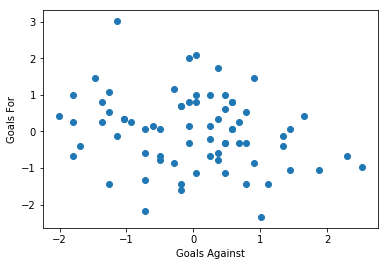

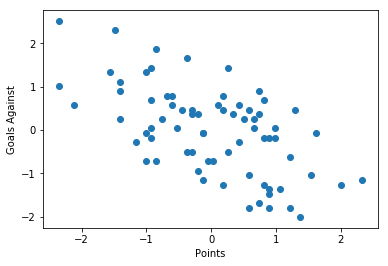

In [7]:
# Make a few scatter plots to see get an idea of clusters
plt.scatter(X_train_df['GA'], X_train_df['GF'])
plt.xlabel('Goals Against')
plt.ylabel('Goals For')
plt.show()

plt.scatter(X_train_df['PTS'], X_train_df['GA'])
plt.xlabel('Points')
plt.ylabel('Goals Against')
plt.show()

Just with these plots it doesn't look promising. Let's make a model to see how it performs.

### Modeling

In [8]:
# Instantiate and fit dbscan
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit(X_train)

# 'eps' is the max distance between 2 samples in order for them to be
# consdiered a seperate cluster
# 'min_samples' is the min number of samples required for a cluster to
# be considered a cluster

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [9]:
labels = dbscan.labels_
print(labels)

# '-1' are observations that did not make it into a DB qualified cluster.

[ 0 -1 -1 -1  0  3 -1  0 -1 -1  1 -1  0 -1  2  0 -1  2  0 -1 -1 -1 -1 -1  2
 -1  0 -1  0 -1 -1  0  0 -1  0 -1  0 -1 -1 -1  0  3  0 -1  2 -1  1 -1 -1 -1
  0 -1  0 -1  0 -1 -1  0  0  3 -1 -1  0 -1  0  2  1  2  0 -1 -1 -1]


In [10]:
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(X_train)
print(dbscan.labels_)
print(len(set(dbscan.labels_)) - 1)

[-1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1]
3


In [11]:
n_clusters = len(set(labels)) - 1 # minus 1 for '-1'
print(n_clusters)

4


In [12]:
sil_coef = metrics.silhouette_score(X_train, labels)
print('Silhouette Coefficient: ', sil_coef)

Silhouette Coefficient:  -0.0666259147997


Just terrible clusters. <br/><br/>
DBSCAN may be a poor choice for data that is densely populated in one area. We got some insight from the initial scatter plots, but just in case let's try to tune our DBSCAN model to see if we can get a decent silhouette score.

In [13]:
# "Gridserch" for best silhouette coefficient
dbscan_gs = []

for eps in range(2, 20):
    for min_samples in range(2, 20):
        try:
            gs = {}
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X_train)
            sil_coef = metrics.silhouette_score(X_train, dbscan.labels_)
            gs['eps'] = eps
            gs['min_samples'] = min_samples
            gs['silhouette_score'] = sil_coef
            dbscan_gs.append(gs)
        except:
            continue

gs_df = pd.DataFrame(dbscan_gs)
gs_df.sort_values('silhouette_score', ascending=False).head()

,eps,min_samples,silhouette_score
31,5,8,0.268373
32,5,9,0.268373
30,5,7,0.268373
33,5,10,0.268373
39,5,16,0.268373


The silhouette score looks to peak ~0.268. Let's evaluate the homegeneity score at eps=5 and min_samples=8.

In [14]:
dbscan = DBSCAN(eps=5, min_samples=8)
dbscan.fit(X_train)

print('Homogeneity score:', metrics.homogeneity_score(y_train, dbscan.labels_))

Homogeneity score: 0.029678340035


With such a low homogeneity score, our clusters aren't doing a proper job and seperation.

## 'make_circles'
make_circles is a dataset in the scikit learn library where we can create clusters of datapoints in circles and determine how far to seperate them. This is a handy dataset to test out clustering algorithms.

In [15]:
# Import data
from sklearn.datasets import make_circles

circles_X, circles_y = make_circles(n_samples=1000, random_state=1337, \
                                   noise=0.1, factor=0.2)

print(circles_X.shape)

# Show top 10 rows
circles_X[0:10,:]

(1000, 2)


array([[ 0.15804298,  0.07298777],
       [ 0.95846984,  0.39218566],
       [ 0.72358811,  0.53878848],
       [-0.16249514, -0.11702255],
       [-0.2991255 ,  0.10329024],
       [-0.20275334, -0.0525741 ],
       [ 0.08096695,  1.07901782],
       [ 0.02287376, -0.2481016 ],
       [ 0.91875549, -0.447058  ],
       [-1.08106076, -0.24393752]])

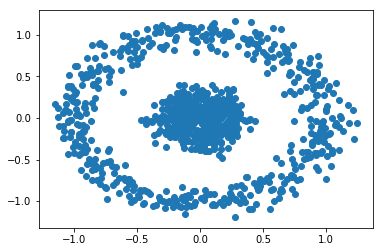

In [16]:
# Plot scatter plot
plt.scatter(circles_X[:,0], circles_X[:,1])

This dataset in the sklearn library is a perfect clustering problem. We can see 2 very distinct clusters graphically- let's see if we can build a model that can also identify these clusters.

In [17]:
# Scale data
ss = StandardScaler()
Xs = ss.fit_transform(circles_X)

dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit(Xs)

print('Clusters: ', set(dbscan.labels_))

Clusters:  {0}


With eps and min_samples set to 3, we only got 1 cluster. Looking at the plot, the distance between the points in the inner circle and outer circle is quite small- maybe around 0.35. We'll set eps to 0.35 for the second model.

In [18]:
dbscan = DBSCAN(eps=0.35, min_samples=3)
dbscan.fit(Xs)

print('Clusters: ', set(dbscan.labels_))

Clusters:  {0, 1}


With 2 clusters it looks like it's clustering the way we intended it to. Let's evaluate the homogenity score next.

In [19]:
print('Homogeneity score:', metrics.homogeneity_score(circles_y, dbscan.labels_))

Homogeneity score: 1.0


With a homogeneity score of 1, we have perfect seperation between the clusters.